# Titanic: Machine Learning from Disaster
### https://www.kaggle.com/c/titanic/data

In [4]:
import os
import pandas as pd
csv_path = os.path.join("datasets", "train.csv")
titanic = pd.read_csv(csv_path)


In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
titanic["Cabin"].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
F2             3
              ..
C85            1
C62 C64        1
C47            1
D7             1
E17            1
Name: Cabin, Length: 147, dtype: int64

In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


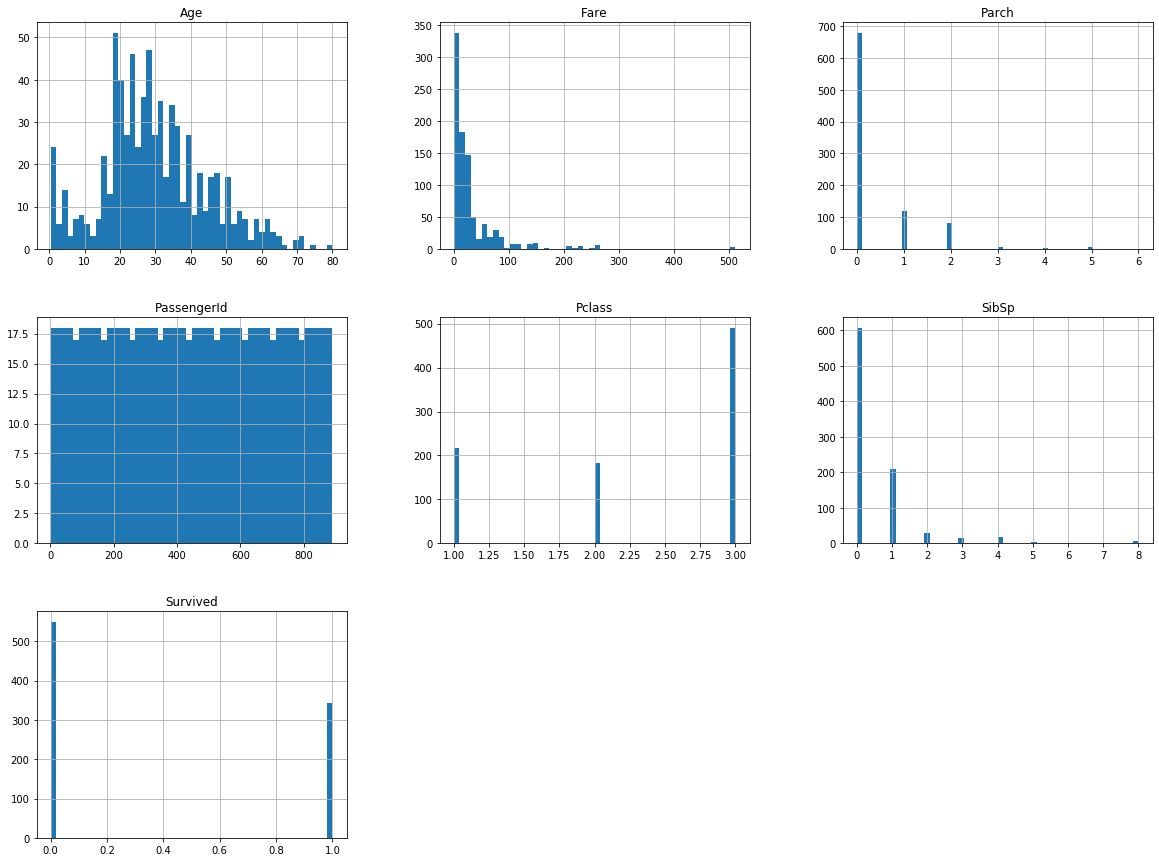

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic.hist(bins=50, figsize=(20, 15))
plt.show()

In [13]:
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"].copy()

In [14]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
type(X)

pandas.core.frame.DataFrame

In [17]:
mapping = {"male":1, "female":2}

In [20]:
X = X.replace({"Sex":mapping})

In [22]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [25]:
X["male"] = (X["Sex"] == 1)

In [26]:
X["female"] = (X["Sex"] == 2)

In [27]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,female
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,False,True
2,3,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,False,True
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,True,False
887,888,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,S,False,True
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,S,False,True
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,True,False


In [31]:
X = X.drop("Sex", axis=1)

In [33]:
X = X.drop("PassengerId", axis=1)

In [34]:
X = X.drop("Name", axis=1)

In [ ]:
#

In [37]:
mapping = {"Cherbourg":"C", "Queenstown":"Q", "Southampton":"S"}
for k in mapping:
    X[k] = (X["Embarked"] == mapping[k]) 

X

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,female,Cherbourg,Queenstown,Southampton
0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,False,False,True
1,1,38.0,1,0,PC 17599,71.2833,C85,C,False,True,True,False,False
2,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,True
3,1,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,True
4,3,35.0,0,0,373450,8.0500,NaN,S,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,211536,13.0000,NaN,S,True,False,False,False,True
887,1,19.0,0,0,112053,30.0000,B42,S,False,True,False,False,True
888,3,NaN,1,2,W./C. 6607,23.4500,NaN,S,False,True,False,False,True
889,1,26.0,0,0,111369,30.0000,C148,C,True,False,True,False,False


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Pclass         891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
male           891 non-null bool
female         891 non-null bool
Cherbourg      891 non-null bool
Queenstown     891 non-null bool
Southampton    891 non-null bool
dtypes: bool(5), float64(2), int64(3), object(3)
memory usage: 60.2+ KB


In [40]:
X = X.drop("Embarked", axis=1)

In [42]:
X = X.drop("Ticket", axis=1)

In [43]:
X

,Pclass,Age,SibSp,Parch,Fare,Cabin,male,female,Cherbourg,Queenstown,Southampton
0,3,22.0,1,0,7.2500,NaN,True,False,False,False,True
1,1,38.0,1,0,71.2833,C85,False,True,True,False,False
2,3,26.0,0,0,7.9250,NaN,False,True,False,False,True
3,1,35.0,1,0,53.1000,C123,False,True,False,False,True
4,3,35.0,0,0,8.0500,NaN,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,NaN,True,False,False,False,True
887,1,19.0,0,0,30.0000,B42,False,True,False,False,True
888,3,NaN,1,2,23.4500,NaN,False,True,False,False,True
889,1,26.0,0,0,30.0000,C148,True,False,True,False,False


In [44]:
X = X.drop("Cabin", axis=1)

In [45]:
X

,Pclass,Age,SibSp,Parch,Fare,male,female,Cherbourg,Queenstown,Southampton
0,3,22.0,1,0,7.2500,True,False,False,False,True
1,1,38.0,1,0,71.2833,False,True,True,False,False
2,3,26.0,0,0,7.9250,False,True,False,False,True
3,1,35.0,1,0,53.1000,False,True,False,False,True
4,3,35.0,0,0,8.0500,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,True,False,False,False,True
887,1,19.0,0,0,30.0000,False,True,False,False,True
888,3,NaN,1,2,23.4500,False,True,False,False,True
889,1,26.0,0,0,30.0000,True,False,True,False,False


In [46]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Cherbourg,Queenstown,Southampton
0,3,22.0,1,0,7.2500,True,False,False,False,True
1,1,38.0,1,0,71.2833,False,True,True,False,False
2,3,26.0,0,0,7.9250,False,True,False,False,True
3,1,35.0,1,0,53.1000,False,True,False,False,True
4,3,35.0,0,0,8.0500,True,False,False,False,True


In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass         891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
male           891 non-null bool
female         891 non-null bool
Cherbourg      891 non-null bool
Queenstown     891 non-null bool
Southampton    891 non-null bool
dtypes: bool(5), float64(2), int64(3)
memory usage: 39.3 KB


In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(X)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [49]:
imputer.statistics_

array([ 3.    , 28.    ,  0.    ,  0.    , 14.4542,  1.    ,  0.    ,
        0.    ,  0.    ,  1.    ])

In [50]:
X.median().values

array([ 3.    , 28.    ,  0.    ,  0.    , 14.4542,  1.    ,  0.    ,
        0.    ,  0.    ,  1.    ])

In [53]:
X = imputer.transform(X)

In [54]:
X

array([[ 3., 22.,  1., ...,  0.,  0.,  1.],
       [ 1., 38.,  1., ...,  1.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  0.,  1.,  0.]])

In [57]:
size = 500
X_train, X_test, y_train, y_test = X[:size], X[size:], y[:size], y[size:]

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/home/harutyun/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error
titanic_predictions = log_reg.predict(X_test)
log_mes = mean_squared_error(y_test, titanic_predictions)
log_rmse = np.sqrt(log_mes)
print(log_rmse)


0.4607344298332387
